In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets.samples_generator import make_blobs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from scipy import linalg

In [4]:
X,y = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

In [5]:
np.random.seed(13)
X_stretched = np.dot(X, np.random.randn(2, 2))

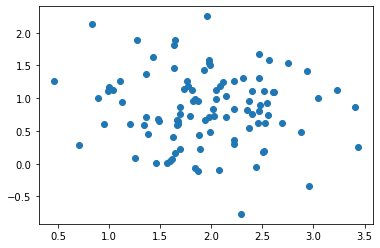

In [6]:
plt.scatter(X[y==1,0],X[y==1,1])

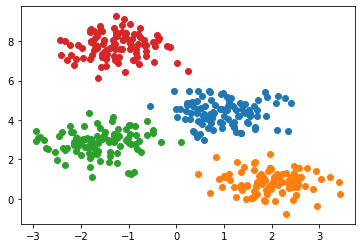

In [7]:
for i in range (4):
    plt.scatter(X[y==i,0],X[y==i,1])

In [8]:
from sklearn.mixture import GaussianMixture

In [9]:
GM = GaussianMixture(n_components=4,covariance_type='full', random_state=0).fit(X)
GM.means_

array([[-1.62515249,  2.84520475],
       [-1.27617979,  7.76207921],
       [ 1.95781368,  0.8377989 ],
       [ 0.93400014,  4.36450124]])

In [10]:
GM.means_[1]

array([-1.27617979,  7.76207921])

In [11]:
y=GM.predict(X)

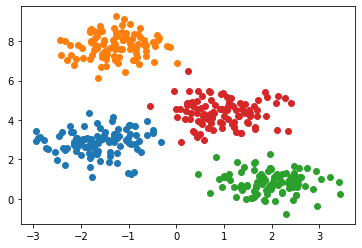

In [12]:
for i in range (4):
    plt.scatter(X[y==i,0],X[y==i,1])
    

In [13]:
from matplotlib.patches import Ellipse

def draw_ellipse(center, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        #print(np.shape(np.sqrt(covariance)))
        if(np.shape(np.sqrt(covariance)) == (2, ) ):
            width, height = 2 * np.sqrt(covariance)
        else:
            width = 2 * np.sqrt(covariance)
            height = 2 * np.sqrt(covariance)
        #try:
        #    width, height = 2 * np.sqrt(covariance)
        #except TypeError:
        #    width, height = 0,0
    
    # Draw the Ellipse
    for i in range(1, 4):
        ax.add_patch(Ellipse(center, i * width, i * height,
                             angle, **kwargs))
        
def plot_ellipses(GM, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = GM.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='inferno', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.20 / GM.weights_.max()
    for pos, covar, w in zip(GM.means_, GM.covariances_, GM.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

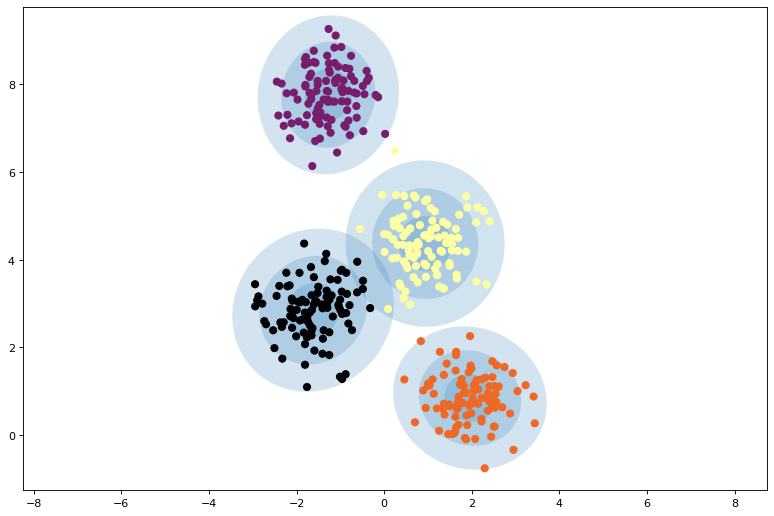

In [14]:
plt.figure(figsize=(12, 8), dpi=80)
plot_ellipses(GM, X)

In [15]:
GM = GaussianMixture(n_components=4,covariance_type='diag', random_state=0).fit(X)
GM

GaussianMixture(covariance_type='diag', n_components=4, random_state=0)

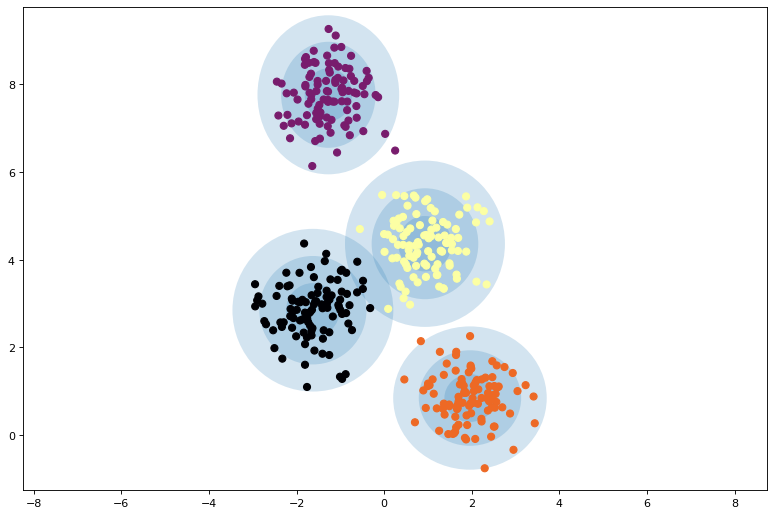

In [16]:
plt.figure(figsize=(12, 8), dpi=80)
plot_ellipses(GM, X)

In [17]:
GM = GaussianMixture(n_components=4,covariance_type='spherical', random_state=0).fit(X)


In [18]:
GM

GaussianMixture(covariance_type='spherical', n_components=4, random_state=0)

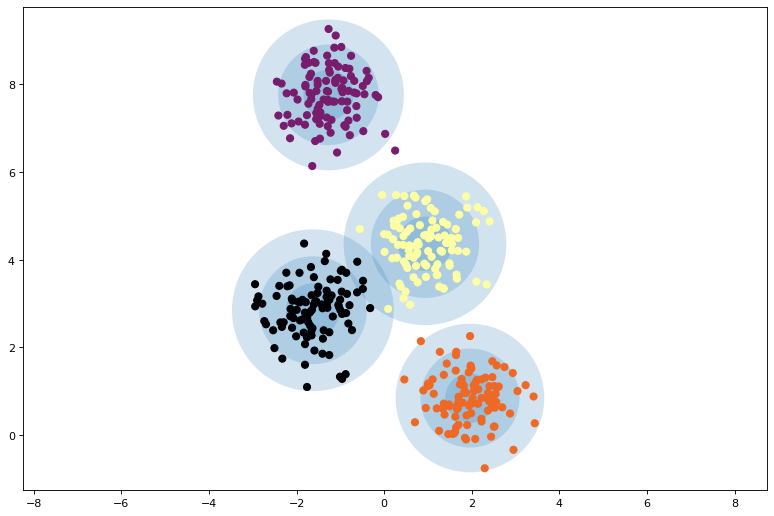

In [19]:
plt.figure(figsize=(12, 8), dpi=80)
plot_ellipses(GM, X)